# Marketing Analytics
by Kuanchieh Peng

## Problem Statement
I am a marketing data analyst and I've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. I need to analyze datasets to understand this problem and propose data-driven solutions.
## Dataset Overview
The data set ifood_df.csv consists of 2206 customers of XYZ company with data on customer profiles, product preferences, campaign successes/failures, and channel performance.
## Sources
Dataset is ifood_df.csv from https://github.com/nailson/ifood-data-business-analyst-test. I do not own this dataset.
## Brief
- Preprocessing
- EDA
- Statistical Analyses
- Visualizations
- CMO Recommendations

## Preprocessing

In [162]:
# for preprocessing, EDA
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# for modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# for statistical analyses and evaluation
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn import metrics
import shap

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# for suppressing warnings
import warnings
warnings.simplefilter("ignore")

In [99]:
# data
df = pd.read_csv('ifood_df.csv')
df_cleaned = df.copy()

## Pipeline

In [100]:
class bold:
    start = '\033[1m'
    end   = '\033[0m'
    
def full_info(df):
    # Prints typically useful statistical information about given dataframe.
    print("This dataframe consists of ", df.shape[1], " columns and", df.shape[0], " rows.")
    print("This dataframe consists of ", df.isnull().sum().sum(), " null entires.")
    print("This dataframe consists of ", df[df.duplicated()].shape[0], " duplicate rows.")
    print("")
    print(bold.start, "Notable statistics of numeric features in this dataset:", bold.end)
    print("")
    print(df.describe())
    print("")
    print(bold.start, "Object type of features in this dataset:", bold.end)
    print("")
    df.info()
    
def short_info(df):
    # Prints selected useful statistical information about given dataframe.
    print("This dataframe consists of ", df.shape[1], " columns and", df.shape[0], " rows.")
    print("This dataframe consists of ", df.isnull().sum().sum(), " null entires.")
    print("This dataframe consists of ", df[df.duplicated()].shape[0], " duplicate rows.")

## EDA

In [101]:
df.head(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0


In [102]:
df.shape

(2205, 39)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

**Annotation on features**
- (Kid)home - number of kids in customer's household
- Recency - number of days since customer's last purchase
- Mnt(Wines) - amount spent on (wine) in the past two years
- Num(Deals)Purchases - number of purchases made with a discount
- Accepted(Cmp3) - 1 if customer accepted offer in third campaign, 0 otherwise
- Response - 1 if customer accepted offer during previous campaign, 0 otherwise
- Complain - 1 if customer had filed one or more complaints in the past two years, 0 otherwise 

In [104]:
full_info(df)

This dataframe consists of  39  columns and 2205  rows.
This dataframe consists of  0  null entires.
This dataframe consists of  184  duplicate rows.

 Notable statistics of numeric features in this dataset: 

              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.00

#### Assessment Report
- There are 184 duplicate rows.
- There are 0 null entries.
- Feature data types are ideal(being numerical).

#### Dropping Duplicates

In [105]:
df_cleaned = df.drop_duplicates()

In [106]:
df_cleaned[df_cleaned.duplicated()].shape[0]

0

In [107]:
title = 'ifood_df_cleaned.csv'
df_cleaned.to_csv(title, index = False)
df = pd.read_csv(title)
del title

#### Checking Cleaned Dataframe

In [108]:
df.head(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0


In [109]:
short_info(df)

This dataframe consists of  39  columns and 2021  rows.
This dataframe consists of  0  null entires.
This dataframe consists of  0  duplicate rows.


#### Investigaing Outliers
We may have no null values, but are there any outliers? Suppose there is, then if needed, how should they be handled/wrangled?

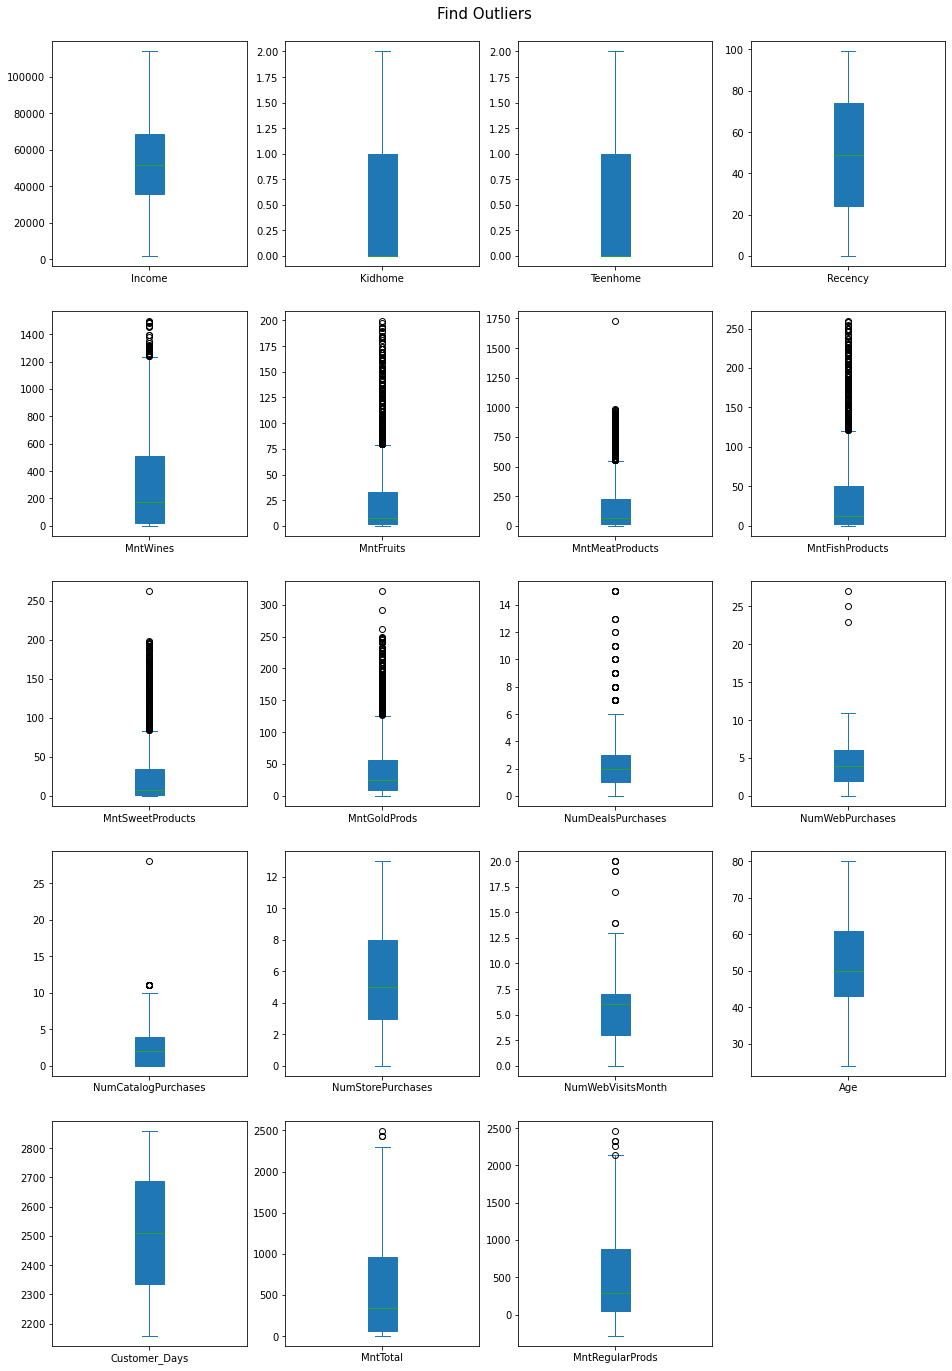

In [110]:
cols_to_drop = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Z_CostContact', 'Z_Revenue', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'AcceptedCmpOverall']
df_for_plot = df.drop(columns = cols_to_drop).select_dtypes(include = np.number)
del cols_to_drop
df_for_plot.plot(subplots = True, layout = (5, 4), kind = 'box', figsize = (16, 24), patch_artist = True)
plt.suptitle('Find Outliers', fontsize = 15, y = 0.9)
plt.savefig('feature_boxplots.png', bbox_inches = 'tight')

There are many features with outliers, but the outliers do seem like they belong(not just due to probability) because of the features' nature. Therefore, I am leaving the outliers as they are. If unexplainable outliers appear, I consider removing them from the feature.

#### Feature Engineering
List of newly created variables.
- Total_Num_Purchases
 - The total number of purchases in the past two years, which can be acquired by summing up all 'Num_Purchases'
- Total_Accepted_Cmp
 - The total number of accepted campaigns, which can be acquired by summing up all 'AcceptedCmp_'
- AOV
 - The average order volume of each customer, which can be calculated by dividing 'MntTotal' by 'Total_num_purchase' 

In [111]:
df['Total_Num_Purchases'] = df.NumDealsPurchases + df.NumWebPurchases + df.NumCatalogPurchases + df.NumStorePurchases + df.NumWebVisitsMonth
df['Total_Accepted_Cmp'] = df.AcceptedCmp1 + df.AcceptedCmp2 + df.AcceptedCmp2 + df.AcceptedCmp2  + df.AcceptedCmp3 + df.AcceptedCmp4 + df.AcceptedCmp5 + df.Response
df['AOV'] = df.MntTotal / df.Total_Num_Purchases

In [112]:
df.head(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Num_Purchases,Total_Accepted_Cmp,AOV
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,32,1,47.781250
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,11,0,1.909091
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,25,0,29.360000


#### Feature Selection
Use a heatmap to plot correlations between each set of variables. Blue indicates a positive correlation while red indicates a negative correlation.
Also take notes of anomalies and patterns.

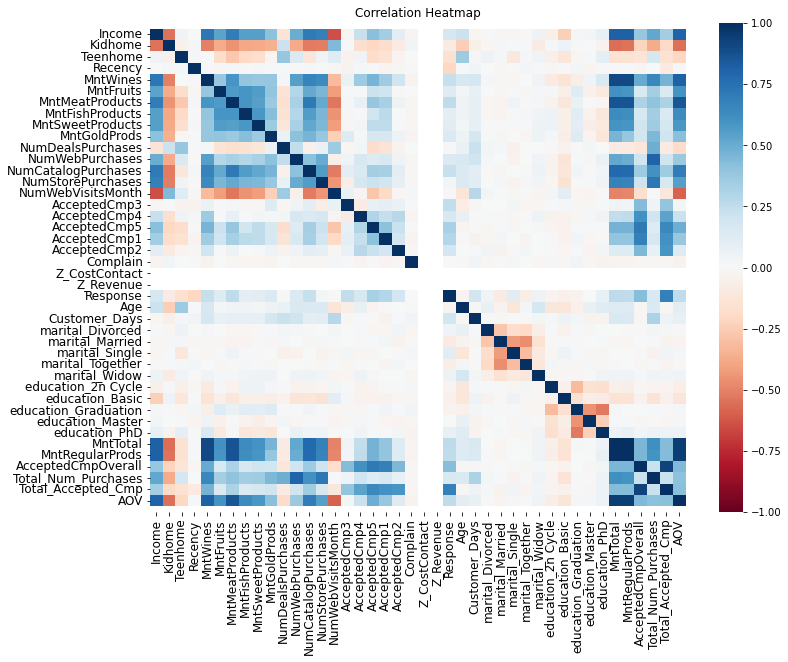

In [121]:
plt.figure(figsize = (12, 9))
s = sb.heatmap(df.corr(),  cmap = 'RdBu', vmin = -1, vmax = 1,center = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap")
plt.savefig('correlation_heatmap.png', bbox_inches = 'tight')
plt.show()

#### Patterns
- High-income individuals
 - tend to spend more and purchase more times
 - tend to visit the company's website less frequently than other people
 - tend to have fewer number of purchases with a discount
- People having kids at home
 - tend to spend less and purchase fewer times
 - tend to has higher number of purchases
- People who purchased with high AOV
 - tend to buy more wines and meat products
 - tend to make higher number of purchases with a catalog
 - tend to not visit the company's website   

#### Anomalies
Intuitively, the more complaints a customer has, the less the customer should spend and the fewer purchases the customer should make. However, the number of complaints in the last two years has nearly no correlation  with the total amount spent in the past two years.

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2021 non-null   float64
 1   Kidhome               2021 non-null   int64  
 2   Teenhome              2021 non-null   int64  
 3   Recency               2021 non-null   int64  
 4   MntWines              2021 non-null   int64  
 5   MntFruits             2021 non-null   int64  
 6   MntMeatProducts       2021 non-null   int64  
 7   MntFishProducts       2021 non-null   int64  
 8   MntSweetProducts      2021 non-null   int64  
 9   MntGoldProds          2021 non-null   int64  
 10  NumDealsPurchases     2021 non-null   int64  
 11  NumWebPurchases       2021 non-null   int64  
 12  NumCatalogPurchases   2021 non-null   int64  
 13  NumStorePurchases     2021 non-null   int64  
 14  NumWebVisitsMonth     2021 non-null   int64  
 15  AcceptedCmp3         

#### Correlation Clustermap

In [129]:
#plt.figure(figsize = (30, 20))
#s = sb.clustermap(df.corr(method = ''),  cmap = 'RdBu', vmin = -1, vmax = 1, center = 0)
#plt.title("Correlation Heatmap")
#plt.show()

#### Investigating Anomaly

Text(0.5, 1.0, 'Complain vs. MntTotal')

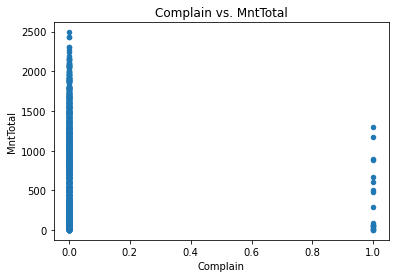

In [130]:
df.plot(x = 'Complain', y = 'MntTotal', kind = 'scatter')
plt.title('Complain vs. MntTotal')

In [134]:
r, p_value = pearsonr(x = df['Complain'], y = df['MntTotal'])
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  -0.030881316598371705
Pearson p-value:  0.1652107099904738


In [141]:
df[df['Complain'] > 0]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Num_Purchases,Total_Accepted_Cmp,AOV
72,26326.0,0,0,12,1,0,5,0,3,9,1,0,0,3,3,0,0,0,0,0,1,3,11,0,44,2457,0,0,0,1,0,1,0,0,0,0,9,0,0,7,0,1.285714
135,38547.0,1,0,49,6,1,10,0,1,4,1,1,0,2,8,0,0,0,0,0,1,3,11,0,39,2464,0,0,0,1,0,0,0,1,0,0,18,14,0,12,0,1.500000
255,31788.0,1,0,15,16,7,23,0,8,6,3,3,0,4,5,0,0,0,0,0,1,3,11,0,37,2260,0,0,1,0,0,0,0,0,1,0,54,48,0,15,0,3.600000
334,38643.0,1,1,45,22,2,14,0,1,10,2,2,0,3,7,0,0,0,0,0,1,3,11,0,42,2371,0,0,1,0,0,0,0,1,0,0,39,29,0,14,0,2.785714
337,65073.0,0,0,65,629,17,177,69,0,8,1,5,3,5,2,0,0,0,0,0,1,3,11,0,77,2472,0,1,0,0,0,0,0,0,1,0,892,884,0,16,0,55.750000
562,39684.0,1,0,41,19,0,35,6,4,17,2,2,1,2,7,0,0,0,0,0,1,3,11,1,36,2784,0,0,1,0,0,0,0,0,0,1,64,47,0,14,1,4.571429
920,15716.0,1,0,8,16,5,30,8,7,26,3,3,0,4,8,0,0,0,0,0,1,3,11,0,32,2753,0,1,0,0,0,1,0,0,0,0,66,40,0,18,0,3.666667
983,38998.0,1,1,92,34,1,14,0,0,5,3,2,0,3,8,0,0,0,0,0,1,3,11,0,66,2762,0,1,0,0,0,0,0,1,0,0,49,44,0,16,0,3.062500
1010,67023.0,0,0,93,444,44,382,11,8,17,1,3,7,13,2,0,0,0,0,0,1,3,11,0,42,2276,0,1,0,0,0,0,0,1,0,0,889,872,0,26,0,34.192308
1113,48070.0,0,1,33,373,14,83,6,9,19,3,8,2,6,7,0,0,0,0,0,1,3,11,0,70,2691,0,0,0,1,0,0,0,1,0,0,485,466,0,26,0,18.653846


In [142]:
df[df['Complain'] > 0].shape[0]

19

In [143]:
df.shape[0]

2021

After invesgitation, there are only 19 customers who complained in the past two years, while we have 2021 customers in total.

#### NumWebPurchases vs. NumWebVisitsMonth

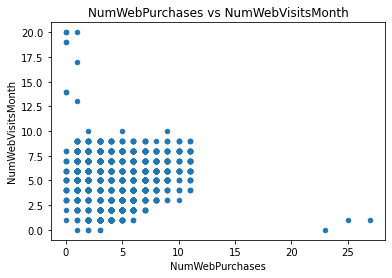

In [146]:
df.plot(x = 'NumWebPurchases', y = 'NumWebVisitsMonth', kind = 'scatter')
plt.title('NumWebPurchases vs NumWebVisitsMonth');

The visualization does not show any correlation between NumWebPurchases and NumWebVisitsMonth.

#### NumStorePurchases & its Potential Factors
Discover or features that are significantly related to the number of store. We can use random forest to predict number of store purchases, then use its feature importance to rank the most correlated features and investigate whether any of them is a factor.

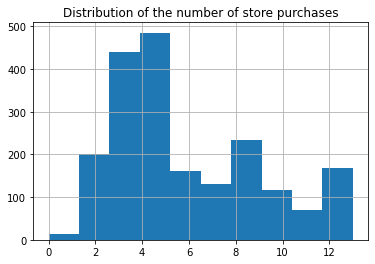

In [148]:
df.NumStorePurchases.hist()
plt.title("Distribution of the number of store purchases");

#### Random Forest
One-hot encoding, splitting data into training and validation set, training a random forest, calculating for errors.

In [157]:
df = pd.get_dummies(df)

X = df.drop(columns=['NumStorePurchases'])
y = df['NumStorePurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3) 

#Create a Random Forest Classifier with 200 trees
rg = RandomForestRegressor(n_estimators = 200, n_jobs = -1)

rg.fit(X_train, y_train)
y_pred=rg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8340691927512356
Mean Squared Error: 1.4945861614497529
Root Mean Squared Error: 1.222532683182643


#### Finding Feature Importance Scores

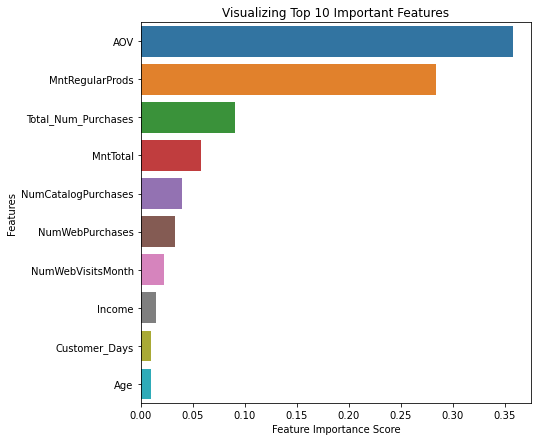

In [165]:
# finding feature importance scores
feature_imp = pd.Series(rg.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

feature_imp = feature_imp[:10]

# Creating a bar plot
plt.figure(figsize = (7, 7))
sb.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Important Features")
plt.savefig('important_feautres.png', bbox_inches='tight')
plt.show()

#### Shap Values - Calculating and Visualizing

 97%|=================== | 588/607 [00:20<00:00]       

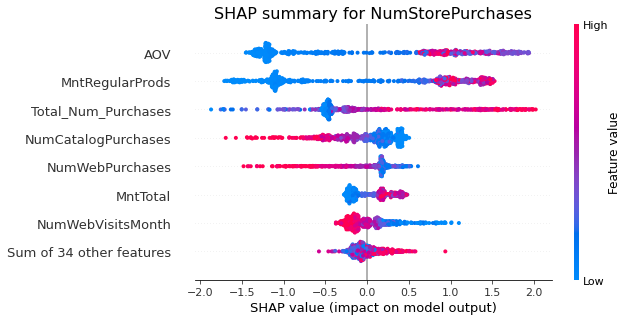

<Figure size 432x288 with 0 Axes>

In [166]:
ex = shap.Explainer(rg, X_train)
shap_values = ex(X_test)

plt.title('SHAP summary for NumStorePurchases', size=16)
fig = shap.plots.beeswarm(shap_values, max_display=8)
plt.savefig('shap.png', bbox_inches='tight')
plt.show()